In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

In [8]:
def sigmoid(z):
    """Fonction sigmoïde."""
    return 1 / (1 + np.exp(-z))

def sigmoid_derivee(z):
    """Derivee de la sigmoïde"""
    return sigmoid(z) * (1 - sigmoid(z))


def forward_pass(x, t, w, ρ = 1):
    """
    Propagation avant et calcul du gradient.

    Paramètres :
        x (list)  : Entrées du réseau [x1, x2].
        t (list)  : Cibles désirées [t1, t2].
        w (list)  : Liste des poids [w0, w1, ..., w7].
        ρ (float) : Facteur d'apprentissage. Par défaut, ρ = 1.

    Retourne :
        L (float) : Perte quadratique moyenne (Mean Squared Error).
        y (list)  : Sorties activées du réseau [y1, y2].
        gradients (list) : Gradients des poids [grad_w0, ..., grad_w7].
    """
    # Étape 1 : Calcul des entrées et sorties des neurones cachés
    h1_in = w[0] * x[0] + w[2] * x[1]  # Entrée pour h1
    h2_in = w[1] * x[0] + w[3] * x[1]  # Entrée pour h2

    h1_out = sigmoid(h1_in)  # Sortie activée pour h1
    h2_out = sigmoid(h2_in)  # Sortie activée pour h2

    # Étape 2 : Calcul des entrées et sorties des neurones de sortie
    y1_in = w[4] * h1_out + w[6] * h2_out  # Entrée pour y1
    y2_in = w[5] * h1_out + w[7] * h2_out  # Entrée pour y2

    y1_out = sigmoid(y1_in)  # Sortie activée pour y1
    y2_out = sigmoid(y2_in)  # Sortie activée pour y2

    # Étape 3 : Calcul de la perte quadratique moyenne (MSE)
    e1 = y1_out - t[0]
    e2 = y2_out - t[1]
    L = e1**2 + e2**2


    # Backpropagation
    delta_y1 = 2*e1 * sigmoid_derivee(y1_in)
    delta_y2 = 2*e2 * sigmoid_derivee(y2_in)

    # Gradients for weights connecting hidden to output layer
    grad_w4 = delta_y1 * h1_out
    grad_w5 = delta_y2 * h1_out
    grad_w6 = delta_y1 * h2_out
    grad_w7 = delta_y2 * h2_out

    # Gradients for weights connecting input to hidden layer
    delta_h1 = (delta_y1 * w[4] + delta_y2 * w[5]) * sigmoid_derivee(h1_in)
    delta_h2 = (delta_y1 * w[6] + delta_y2 * w[7]) * sigmoid_derivee(h2_in)

    grad_w0 = delta_h1 * x[0]
    grad_w1 = delta_h2 * x[0]
    grad_w2 = delta_h1 * x[1]
    grad_w3 = delta_h2 * x[1]

#     gradients = ρ * [grad_w0, grad_w1, grad_w2, grad_w3, grad_w4, grad_w5, grad_w6, grad_w7]
    gradients = ρ * np.array([grad_w0, grad_w1, grad_w2, grad_w3, grad_w4, grad_w5, grad_w6, grad_w7])



    return L, [y1_out, y2_out], gradients

# Données d'entrée
x1 = [2, 1]  # Entrées du réseau
t1 = [1, 0]  # Cibles désirées

x2 = [-1, 3]
t2 = [0, 1]

# Poids donnés
w = [2, -3, -3, 4, 1, -1, 0.25, 2]

# Effectuer la propagation avant
L, y, grad = forward_pass(x1, t1, w)
valeurs_sans_np = [float(v) for v in grad]

print("\tPour x1 et t1: ")
print(f"Sorties du réseau : y1 = {y[0]:.3f}, y2 = {y[1]:.3f}")
print(f"Perte quadratique (Loss) : L = {L:.3f}")
print(f"Nouveau gradient de L = {valeurs_sans_np}")


# Effectuer la propagation avant
L, y, grad = forward_pass(x2, t2, w)
valeurs_sans_np = [float(v) for v in grad]

print("\n\tPour x2 et t2: ")
print(f"Sorties du réseau : y1 = {y[0]:.3f}, y2 = {y[1]:.3f}")
print(f"Perte quadratique (Loss) : L = {L:.3f}")
print(f"Nouveau gradient de L = {valeurs_sans_np}")

	Pour x1 et t1: 
Sorties du réseau : y1 = 0.682, y2 = 0.379
Perte quadratique (Loss) : L = 0.245
Nouveau gradient de L = [-0.1245799920310608, 0.06774106237304037, -0.0622899960155304, 0.033870531186520184, -0.10106080200900529, 0.13055095827032773, -0.016478491947864934, 0.021287016052494324]

	Pour x2 et t2: 
Sorties du réseau : y1 = 0.562, y2 = 0.881
Perte quadratique (Loss) : L = 0.330
Nouveau gradient de L = [-5.039984614038973e-06, -5.84951168236954e-09, 1.511995384211692e-05, 1.7548535047108622e-08, 4.622002203780851e-06, -4.180665865731328e-07, 0.2767429523030238, -0.02503178846017317]


## 3. Training and testing the network

### 3.1 Training and testing on three samples

Iteration 10/100, Pertes: 0.088345
Iteration 20/100, Pertes: 0.044203
Iteration 30/100, Pertes: 0.028984
Iteration 40/100, Pertes: 0.021447
Iteration 50/100, Pertes: 0.016975
Iteration 60/100, Pertes: 0.014021
Iteration 70/100, Pertes: 0.011927
Iteration 80/100, Pertes: 0.010368
Iteration 90/100, Pertes: 0.009163
Iteration 100/100, Pertes: 0.008204


w initial:
 [2, -3, -3, 4, 1, -1, 0.25, 2]
et w après entrainement:
 [3.027, -3.679, -2.487, 3.66, 2.812, -2.836, -2.618, 2.782]



Perte pour x3 et t3 : 1.754797


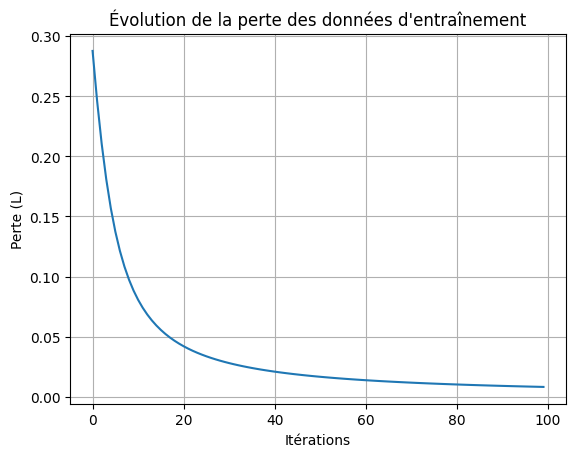

In [17]:
def training(x1, x2, t1, t2, ρ, N, w):
    """
    Effectue l'entraînement avec mise à jour des poids.

    Paramètres :
        x1, x2, t1, t2 (np.ndarray) : Données d'entrée et cibles.
        ρ (float) : Taux d'apprentissage.
        N (int) : Nombre d'itérations.
        w (list) : Poids initiaux du réseau.

    Retourne :
        L_history (list) : Liste des pertes par échantillon.
        w (list) : Poids mis à jour après l'entraînement.
    """
    L_history = []  # Historique des pertes

    for epoch in range(N):
        # Forward and backward pass for the first sample
        L1, _, w1 = forward_pass(x1, t1, w, ρ)
        
        # Forward and backward pass for the second sample
        L2, _, w2 = forward_pass(x2, t2, w, ρ)
        

        # Compute mean gradients
        mean_grad = [(g1 + g2) / 2 for g1, g2 in zip(w1, w2)]

        # Update weights using the mean gradient
        w = [w_i - ρ * grad_i for w_i, grad_i in zip(w, mean_grad)]


        # Compute mean loss
        L = (L1 + L2) / 2
        L_history.append(L)
        
        # Print loss every 100 iterations
        if (epoch + 1) % (N / 10) == 0:
            print(f"Iteration {epoch + 1}/{N}, Pertes: {L:.6f}")

    return L_history, w


ρ = 1.2   # Taux d'apprentissage
m = 200  # Nombre d'échantillons dans un mini-batch
N = 100   # Nombre d'itérations

L_history, w_update = training(x1, x2, t1, t2, ρ, N, w)

plt.plot(L_history)
plt.xlabel('Itérations')
plt.ylabel('Perte (L)')
plt.title('Évolution de la perte des données d\'entraînement')
plt.grid()

affichage_w = [float(np.round(v, 3)) for v in w_update]
print(f"\n\nw initial:\n {w}\net w après entrainement:\n {affichage_w}")

# ----------------------------------------------------------------
# Donnée test: 
x3 = [1, 4]
t3 = [1, 0]

L_new, _, _ = forward_pass(x3, t3, w_update, ρ)
print(f"\n\n\nPerte pour x3 et t3 : {L_new:.6f}")

### 3.2 Training and testing on a large dataset

Époque 1/10, Perte moyenne: 0.080721
Époque 2/10, Perte moyenne: 0.044684
Époque 3/10, Perte moyenne: 0.042052
Époque 4/10, Perte moyenne: 0.041140
Époque 5/10, Perte moyenne: 0.040672
Époque 6/10, Perte moyenne: 0.040424
Époque 7/10, Perte moyenne: 0.040292
Époque 8/10, Perte moyenne: 0.040219
Époque 9/10, Perte moyenne: 0.040178
Époque 10/10, Perte moyenne: 0.040155


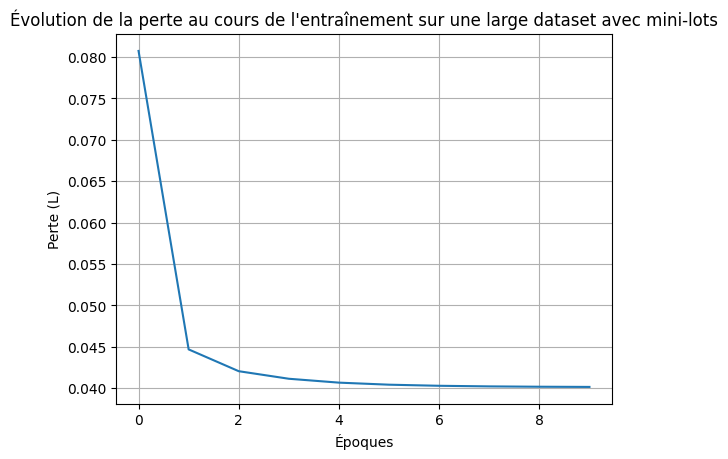


Poids initiaux : [2, -3, -3, 4, 1, -1, 0.25, 2]
Poids après entraînement : [np.float64(0.8535600375476429), np.float64(-2.7128215301185827), np.float64(-3.560243713505849), np.float64(4.153916056611383), np.float64(1.934085610313238), np.float64(-1.9853711119624393), np.float64(-1.8688613400861034), np.float64(2.1042662903654246)]


In [14]:
def training_with_batches(x1, x2, t1, t2, ρ, N, w, m):
    """
    Effectue l'entraînement avec des mini-lots (batches).

    Paramètres :
        x1, x2, t1, t2 (np.ndarray) : Données d'entrée et cibles.
        ρ (float) : Taux d'apprentissage.
        N (int) : Nombre d'époques.
        w (list) : Poids initiaux du réseau.
        m (int) : Taille des mini-lots.

    Retourne :
        L_history (list) : Liste des pertes par échantillon.
        w (list) : Poids mis à jour après l'entraînement.
    """
    L_history = []  # Historique des pertes

    num_samples = len(x1)  # Nombre total d'échantillons
    num_batches = num_samples // m  # Nombre de mini-lots

    for epoch in range(N):
        epoch_loss = 0  # Perte moyenne pour cette époque

        for batch_idx in range(num_batches):
            # Sélection des indices pour le mini-lot
            start_idx = batch_idx * m
            end_idx = start_idx + m

            # Extraire le mini-lot
            x1_batch = x1[start_idx:end_idx]
            x2_batch = x2[start_idx:end_idx]
            t1_batch = t1[start_idx:end_idx]
            t2_batch = t2[start_idx:end_idx]

            # Initialiser les gradients moyens pour ce lot
            grad_mean = [0] * len(w)
            batch_loss = 0

            # Calcul des gradients pour chaque échantillon dans le mini-lot
            for i in range(m):
                L, _, grad = forward_pass([x1_batch[i], x2_batch[i]], 
                                          [t1_batch[i], t2_batch[i]], w)
                batch_loss += L
                grad_mean = [gm + g for gm, g in zip(grad_mean, grad)]

            # Moyenne des gradients et de la perte sur le mini-lot
            grad_mean = [gm / m for gm in grad_mean]
            batch_loss /= m

            # Mise à jour des poids
            w = [w_i - ρ * grad_i for w_i, grad_i in zip(w, grad_mean)]

            # Ajouter la perte du mini-lot à la perte totale pour l'époque
            epoch_loss += batch_loss

        # Moyenne de la perte pour l'époque
        epoch_loss /= num_batches
        L_history.append(epoch_loss)

        # Afficher la perte toutes les 10% d'époques
        if (epoch + 1) % (N // 10) == 0:
            print(f"Époque {epoch + 1}/{N}, Perte moyenne: {epoch_loss:.6f}")

    return L_history, w


# Chargement des données d'entraînement
data_training = pd.read_csv(r'NNTraining.data', header=None)
x1_train = data_training.iloc[:, 0].values
x2_train = data_training.iloc[:, 1].values
t1_train = data_training.iloc[:, 2].values
t2_train = data_training.iloc[:, 3].values

# Hyperparamètres
ρ = 10  # Taux d'apprentissage
m = 50   # Taille des mini-lots
N = 10  # Nombre d'époques

# Poids initiaux
w = [2, -3, -3, 4, 1, -1, 0.25, 2]

# Entraînement avec mini-lots
L_history, w_update = training_with_batches(x1_train, x2_train, t1_train, t2_train, ρ, N, w, m)

# Affichage des résultats
plt.plot(L_history)
plt.xlabel('Époques')
plt.ylabel('Perte (L)')
plt.title('Évolution de la perte au cours de l\'entraînement sur une large dataset avec mini-lots')
plt.grid()
plt.show()

print(f"\nPoids initiaux : {w}")
print(f"Poids après entraînement : {w_update}")


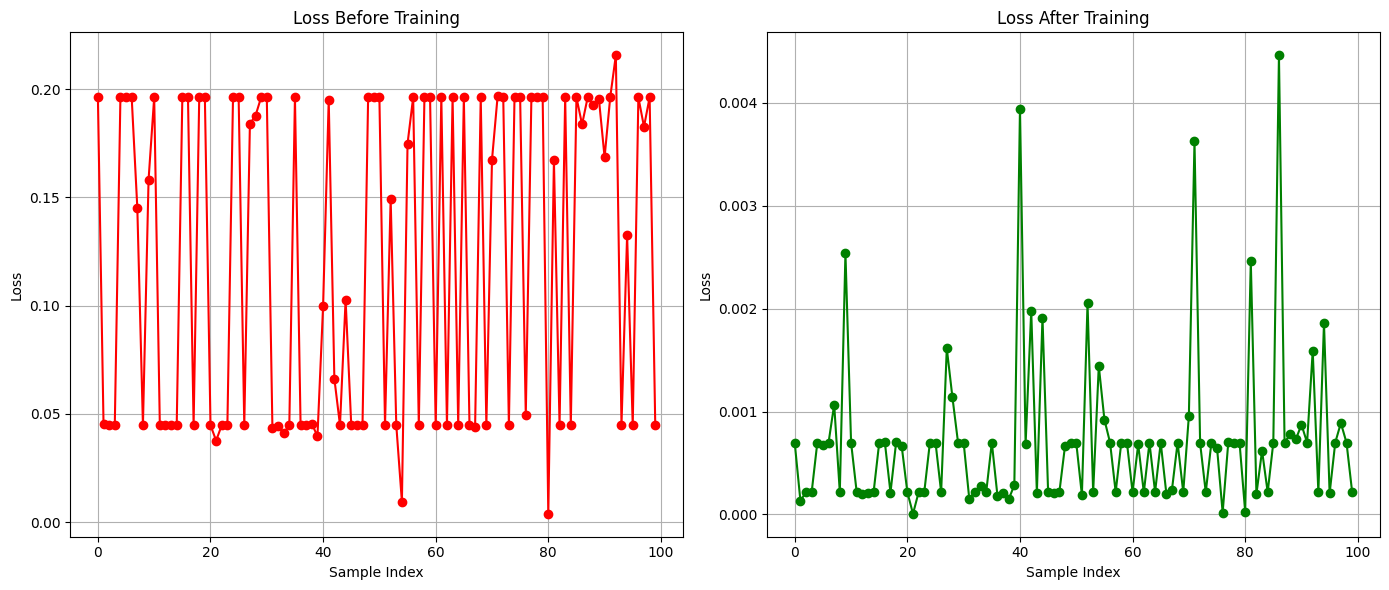

Average Loss Before Training: 0.185942
Average Loss After Training: 0.078880


In [12]:
# Load the test dataset
data_test = pd.read_csv('NNTest.data', header=None)
x1_test = data_test.iloc[:, 0].values
x2_test = data_test.iloc[:, 1].values
t1_test = data_test.iloc[:, 2].values
t2_test = data_test.iloc[:, 3].values

def evaluate_and_plot_loss(x1, x2, t1, t2, w_initial, w_trained):
    """
    Évalue les performances du réseau avant et après l'entraînement,
    puis les affiches sur deux plots.

    Paramètres :
        x1, x2, t1, t2 (np.ndarray) : Données d'entrée et cibles.
        w_initial (list) : Poids avant entraînement.
        w_trained (list) : Poids après entraînement.
    """
    # Initialize lists to store losses
    loss_before_training = []
    loss_after_training = []

    # Compute losses before and after training for each test sample
    for i in range(len(x1)):
        # Loss before training
        L_before, _, _ = forward_pass([x1[i], x2[i]], [t1[i], t2[i]], w_initial)
        loss_before_training.append(L_before)

        # Loss after training
        L_after, _, _ = forward_pass([x1[i], x2[i]], [t1[i], t2[i]], w_trained)
        loss_after_training.append(L_after)

    # Plot the losses
    plt.figure(figsize=(14, 6))

    # Losses before training
    plt.subplot(1, 2, 1)
    plt.plot(loss_before_training[1:], marker='o', linestyle='-', color='r')
    plt.title("Loss Before Training")
    plt.xlabel("Sample Index")
    plt.ylabel("Loss")
    plt.grid()

    # Losses after training
    plt.subplot(1, 2, 2)
    plt.plot(loss_after_training[1:], marker='o', linestyle='-', color='g')
    plt.title("Loss After Training")
    plt.xlabel("Sample Index")
    plt.ylabel("Loss")
    plt.grid()

    plt.tight_layout()
    plt.show()

    # Print average loss before and after training
    avg_loss_before = np.mean(loss_before_training)
    avg_loss_after = np.mean(loss_after_training)
    print(f"Average Loss Before Training: {avg_loss_before:.6f}")
    print(f"Average Loss After Training: {avg_loss_after:.6f}")

# Evaluate and plot the losses
evaluate_and_plot_loss(x1_test, x2_test, t1_test, t2_test, w, w_update)